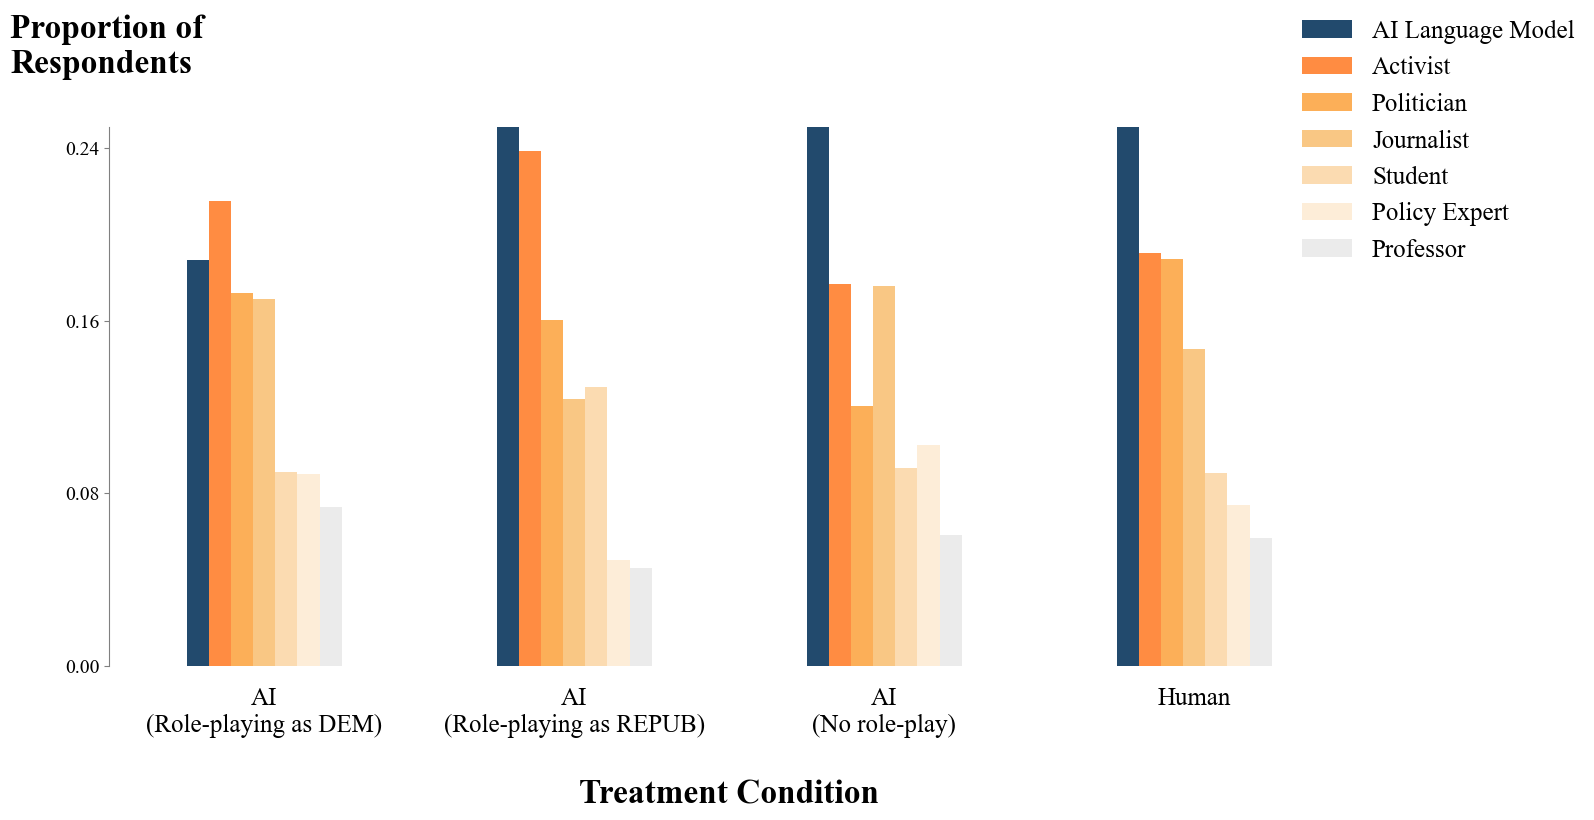

In [1]:
# ------------------------------
# FIG S3: AUTHORSHIP

# This code is used to generate the data and figures for Figure S3 in the paper.
# ------------------------------

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.stats import chisquare

# Constants
CSV_FILE = '../data/final_dataset.csv'
X_AXIS_LABELS = [
    'AI\n(Role-playing as DEM)',
    'AI\n(Role-playing as REPUB)',
    'AI\n(No role-play)',
    'Human'
]
AUTHORSHIP_ORDER = [
    'AI Language Model',
    'Activist',
    'Politician',
    'Journalist',
    'Student',
    'Policy Expert',
    'Professor'
]
COLOR_DICT = dict(zip(AUTHORSHIP_ORDER, ['#224A6D', '#FF8C42', '#FCAF58', '#F9C784', '#FBDBB1', '#FDEDD8','#EBEBEB']))

# Functions
def read_and_filter_data(file):
    data = pd.read_csv(file)
    return data[data['treatment'] != 'control']

def get_authorship_proportions(data):
    distribution = data.groupby('treatment')['authorship'].value_counts().unstack()
    proportions = distribution.divide(distribution.sum(axis=1), axis=0)
    sorted_columns = proportions.mean().sort_values(ascending=False).index
    return proportions[sorted_columns]

def plot_authorship_proportions(proportions):
    plt.rcParams['font.family'] = 'Times New Roman'
    ax = proportions.plot(
        kind='bar',
        figsize=(16, 7),
        color=[COLOR_DICT[i] for i in AUTHORSHIP_ORDER]
    )
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
    ax.set_ylim(0, 0.25)
    ax.tick_params(axis='y', labelsize=14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_visible(False)
    ax.set_xticklabels(X_AXIS_LABELS, rotation=0, fontname='Times New Roman', fontsize=18)
    ax.tick_params(axis='x', length=0, pad=15)
    ax.yaxis.set_tick_params(direction='out', color='grey')
    ax.text(-0.08, 1.1, 'Proportion of\nRespondents', fontsize=24, weight='bold', transform=ax.transAxes)
    ax.set_xlabel('Treatment Condition', fontsize=24, weight='bold', labelpad=30)
    plt.legend(loc='upper right', prop={'family': 'Times New Roman', 'size': 18}, labels=AUTHORSHIP_ORDER, bbox_to_anchor=(1.2, 1.24), frameon=False)
    plt.xticks(rotation=0)
    fig = plt.gcf()
    plt.show()
    return fig
    

def main():
    filtered_data = read_and_filter_data(CSV_FILE)
    authorship_proportions = get_authorship_proportions(filtered_data)
    fig = plot_authorship_proportions(authorship_proportions)
    fig.savefig('authorship.pdf', bbox_inches='tight')

if __name__ == '__main__':
    main()


In [2]:
def get_ai_language_model_proportions(data):
    distribution = data.groupby('treatment')['authorship'].value_counts().unstack()
    proportions = distribution.divide(distribution.sum(axis=1), axis=0)
    ai_language_model_proportions = proportions['AI language model']
    return ai_language_model_proportions

def main():
    filtered_data = read_and_filter_data(CSV_FILE)
    ai_language_model_proportions = get_ai_language_model_proportions(filtered_data)
    print(ai_language_model_proportions.to_frame())

if __name__ == '__main__':
    main()

              AI language model
treatment                      
dem                    0.188353
human                  0.253188
no role-play           0.271325
repub                  0.249772


In [3]:
def test_proportions_significance(data):
    distribution = data.groupby('treatment')['authorship'].value_counts().unstack()
    p_values = {}
    for treatment in distribution.index:
        observed = distribution.loc[treatment]
        expected = observed.sum() / len(observed)
        chi2, p = chisquare(observed, f_exp=expected)
        p_values[treatment] = p
    return p_values

def main():
    filtered_data = read_and_filter_data(CSV_FILE)
    p_values = test_proportions_significance(filtered_data)
    for treatment, p_value in p_values.items():
        print(f"P-value for {treatment}: {p_value}")

if __name__ == '__main__':
    main()

P-value for dem: 8.758979294651956e-30
P-value for human: 3.967960477075731e-64
P-value for no role-play: 1.5334199394056022e-47
P-value for repub: 1.411847062078054e-47
